<a href="https://colab.research.google.com/github/Aakansh-Nandi/Smartknowerminiproject/blob/main/Mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classifier which classifies between rose, nano car and pancake


In [ ]:
!pip install bing_image_downloader
!mkdir images

In [ ]:
from bing_image_downloader import downloader
downloader.download('Red Rose Flower',limit=50,output_dir='images',adult_filter_off=True)
downloader.download('nano car',limit=50,output_dir='images',adult_filter_off=True)
downloader.download('pancake',limit=50,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 50 Images on Page 1.


[%] Downloading Image #1 from http://3.bp.blogspot.com/-qkvGT0AnjoE/UQWLkj2B0dI/AAAAAAAAAFI/XeAnVduS6RQ/s1600/Beautiful+Red+Rose+Flowers+Pictures.JPG
[%] File Downloaded !

[%] Downloading Image #2 from http://www.reportingday.com/wp-content/uploads/2018/06/Attarective-Rose-Images.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://wallpapercave.com/wp/tL32kV1.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://1.bp.blogspot.com/-BX7HTWmXk8s/UNHegN_YkXI/AAAAAAAAdMk/oxPKhfOFCuM/s1600/Flowers+wallpapers+red+roses.+(4).jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://1.bp.blogspot.com/-nt0BZeLUtAQ/UQWLgtHQZWI/AAAAAAAAAEE/Usf1MdOEYF4/s1600/Beautiful+Red+Rose+Flowers+Pictures+16.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i.ytimg.com/vi/zOkAMquF5vA/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://4.bp.blogspot.com/-2B6x1dQJxgs/UZ4PcbRk72I/AAAAAA

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target=[]
images=[]
flat_data=[]
DIR='/content/images'
CATEGORIES=['Red Rose Flower','nano car','pancake']

for cat in CATEGORIES:
  class_num=CATEGORIES.index(cat) 
  path=os.path.join(DIR,cat)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resize=resize(img_array,(150,150,3))#rescaling
    flat_data.append(img_resize.flatten())#flattening
    images.append(img_resize)
    target.append(class_num)
flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images)

<BarContainer object of 3 artists>

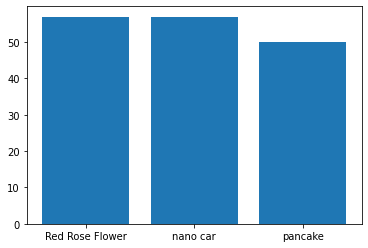

In [ ]:
unique,count=np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.3,random_state=69)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
            {'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]
svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
y_pred=clf.predict(x_test)
y_pred

array([0, 2, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 0, 0, 1, 2,
       2, 1, 1, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 1, 0, 0, 2, 1,
       2, 0, 0, 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.92

In [ ]:
confusion_matrix(y_pred,y_test)

array([[14,  0,  0],
       [ 0, 16,  2],
       [ 2,  0, 16]])